This notebook estimates the zero points of the Subaru observations based on comparison with the SDSS overlapping stars. The Subaru and SDSS catalogs are matched using TopCat spatial matching. See RXCJ2211_zeropoints.md for more details.

Much of this is currently very rough since I just need something quick and rough for Hectospec targeting purposes.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.stats import linregress

In [3]:
# read in the matched catalog
cat = pandas.read_csv('/Users/dawson/OneDrive/Research/Clusters/RXCJ2211/catalogs/rxcj2211_SDSSstars_match_Subaru.csv')

# Zero points based on differeincing
## V
Again I am being very rough here and using the average of the SDSS g-band and r-band magnitudes to zeropoint the Subaru V-band image.

In [6]:
v_sdss = np.mean((cat['g'],cat['r']),axis=0)

In [24]:
g_sdss_min = 16
g_sdss_max = 22
g_sub_min = -20
g_sub_max = 0

mask_g = np.logical_and(np.logical_and(v_sdss > g_sdss_min, v_sdss < g_sdss_max),
                        np.logical_and(cat['MAG_AUTO_V'] > g_sub_min, cat['MAG_AUTO_V'] < g_sub_max))

In [25]:
mean_dif_g = np.mean(np.array(v_sdss[np.array(mask_g)])-np.array(cat['MAG_AUTO_V'][mask_g]))
median_dif_g = np.median(np.array(v_sdss[np.array(mask_g)])-np.array(cat['MAG_AUTO_V'][mask_g]))
print 'g zero point based on median = {0:0.3f}'.format(median_dif_g)
print 'g zero point based on mean = {0:0.3f}'.format(mean_dif_g)

g zero point based on median = 27.059
g zero point based on mean = 27.078


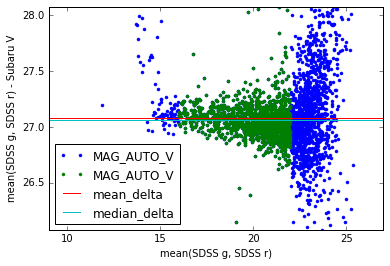

In [26]:
fig = plt.figure()
plt.plot(v_sdss,v_sdss-cat['MAG_AUTO_V'],'.')
plt.plot(v_sdss[np.array(mask_g)],v_sdss[np.array(mask_g)]-cat['MAG_AUTO_V'][mask_g],'.')
x_lim = plt.xlim((9,27))
plt.plot(x_lim,(mean_dif_g,mean_dif_g),label='mean_delta')
plt.plot(x_lim,(median_dif_g,median_dif_g),label='median_delta')
plt.ylim((mean_dif_g-1,mean_dif_g+1))
plt.xlabel('mean(SDSS g, SDSS r)')
plt.ylabel('mean(SDSS g, SDSS r) - Subaru V')
plt.legend(loc=0)

## i

In [29]:
i_sdss_min = 16
i_sdss_max = 21
i_sub_min = -15
i_sub_max = 0

mask_i = np.logical_and(np.logical_and(cat['i'] > i_sdss_min, cat['i'] < i_sdss_max),
                        np.logical_and(cat['MAG_AUTO_i'] > i_sub_min, cat['MAG_AUTO_i'] < i_sub_max))

mean_dif_i = np.mean(np.array(cat['i'][mask_i])-np.array(cat['MAG_AUTO_i'][mask_i]))
median_dif_i = np.median(np.array(cat['i'][mask_i])-np.array(cat['MAG_AUTO_i'][mask_i]))
print 'i zero point based on median = {0:0.3f}'.format(median_dif_i)
print 'i zero point based on mean = {0:0.3f}'.format(mean_dif_i)

i zero point based on median = 27.325
i zero point based on mean = 27.342


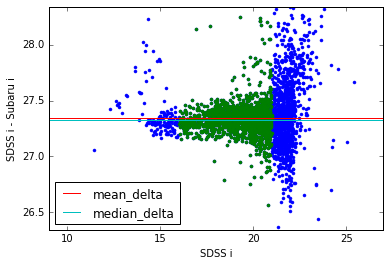

In [30]:
fig = plt.figure()
plt.plot(cat['i'],cat['i']-cat['MAG_AUTO_i'],'.')
plt.plot(cat['i'][mask_i],cat['i'][mask_i]-cat['MAG_AUTO_i'][mask_i],'.')
x_lim = plt.xlim((9,27))
plt.plot(x_lim,(mean_dif_i,mean_dif_i),label='mean_delta')
plt.plot(x_lim,(median_dif_i,median_dif_i),label='median_delta')
plt.ylim((mean_dif_i-1,mean_dif_i+1))
plt.xlabel('SDSS i')
plt.ylabel('SDSS i - Subaru i')
plt.legend(loc=0)

## Summary
Use the median zero point estimates rather than the regression estimates since it should be more robust and is a more direct measure.

In [31]:
print 'Results:'
print '---------'
print 'band    ZP'
print '----  ------'
print 'g     {0:0.3f}'.format(median_dif_g)
print 'i     {0:0.3f}'.format(median_dif_i)

Results:
---------
band    ZP
----  ------
g     27.059
i     27.325
